This is my attempt to explore and visualize Diamonds dataset. I shall use three libraries for visualization - matplotlib, ggplot, and seaborn. The objective of this notebook is to try with different visuals and make sense of the data. Towards the end, I shall also split the data into training and test dataset with different proportions and check the change in accuracy to apply different ML algorithms.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ggplot import *
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("../input/diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


This is a great start as there are no missing values in this dataset to deal with, which obviously is a rare scenario.

Proceeding with data exploration through plotting.

Text(0.5,1,'Distribution of Diamond Price')

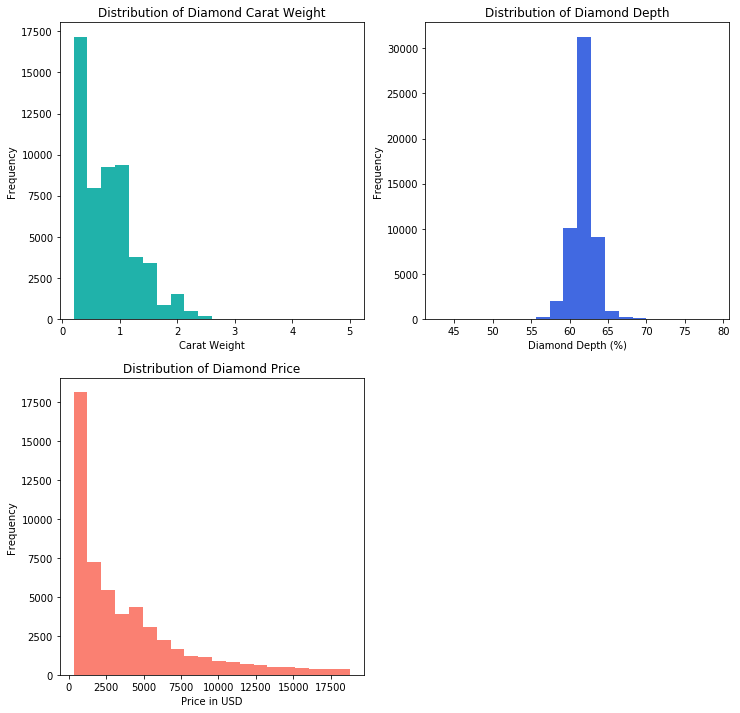

In [6]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='lightseagreen')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(df['depth'],bins=20,color='royalblue')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(df['price'],bins=20,color='salmon')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

Diamond depth as can be seen from the second plot above is normally distributed. Majority diamonds seem to have a depth of ~60-65% range. This is consistent with our intuition about diamonds as optimum depth is needed to fit any diamond in piece of jewellery like ring.

Carat weight distribution is right skewed which means that majority diamonds in this dataset have on an average low carat weight

Similarly, diamond price is also right skewed which is again consistent with an intuitive observation. Majority of the diamonds in this dataset have a price below 5000 USD

Next, let's look at the corelations of the different variables in this dataset.

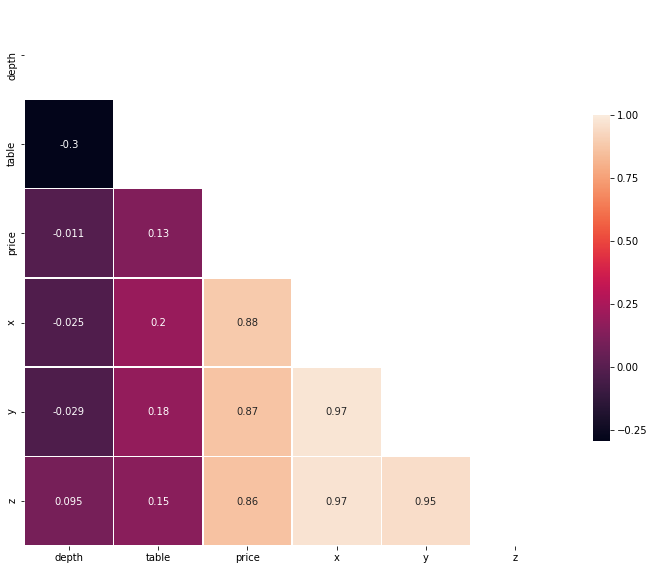

In [7]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Clearly, price has strong correlation with all three size dimensions.

Next couple of graphs, I will explore the data more in depth using ggplot faceted plots

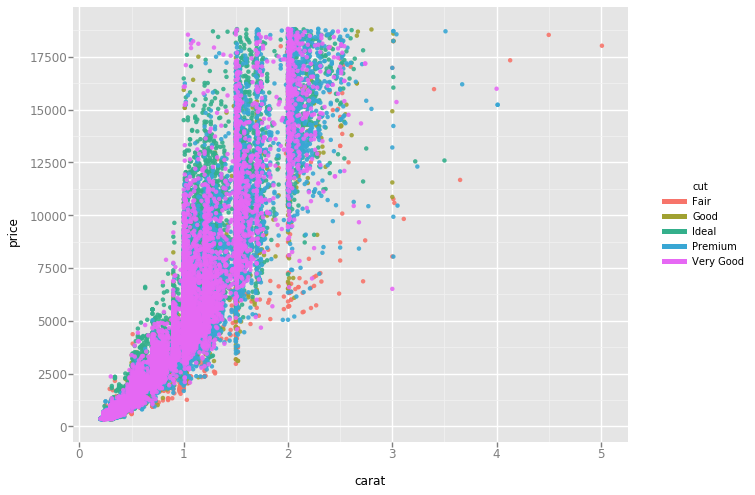

<ggplot: (8770806423823)>

In [8]:
ggplot(aes(x = 'carat', y = 'price', color = 'cut'), data = df) + geom_point(alpha = 0.9)

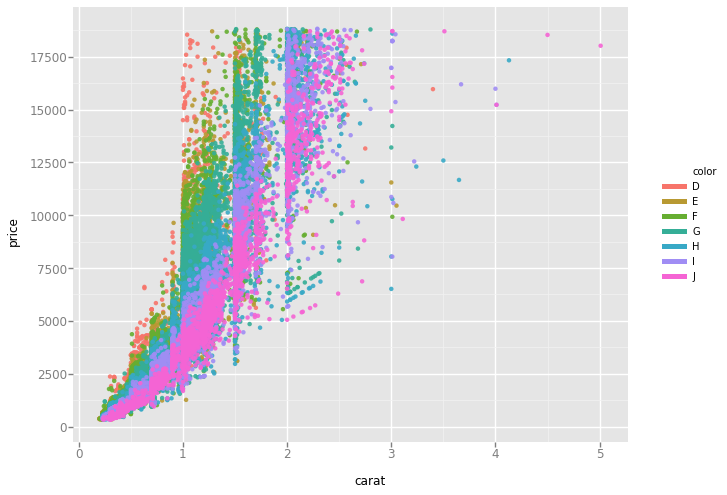

<ggplot: (-9223363266168295515)>

In [ ]:
ggplot(aes(x = 'carat', y = 'price', color = 'color'), data = df) + geom_point(alpha = 0.9)

In [ ]:
ggplot(aes(x = 'carat', y = 'price', color = 'clarity'), data = df) + geom_point(alpha = 0.9)

In [ ]:
ggplot(aes(x = 'carat', y = 'price', color = 'color', shape = 'cut', group = 'clarity'), data = df) + geom_point(alpha = 1) + facet_wrap( "color") 

In [ ]:
ggplot(aes(x = 'carat', y = 'price', color = 'color', shape = 'cut', group = 'cut'), data = df) + geom_point(alpha = 1) + facet_wrap( "cut") 

Curious to understand what is the relationship of each of these variables with price.

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))

sns.regplot(x = 'carat', y = 'price', data=df, ax = saxis[0,0])
sns.regplot(x = 'x', y = 'price', data=df, ax = saxis[0,1])
sns.regplot(x = 'y', y = 'price', data=df, ax = saxis[1,0])
sns.regplot(x = 'z', y = 'price', data=df, ax = saxis[1,1])

In [ ]:
sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=df)

In [ ]:
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=df)

In [ ]:
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=df)

Now let's split the data into test and training datasets and explore the optimum proportion for maximum accuracy

In [ ]:
# Creating categorical variables for 'cut', 'color', and 'clarity'
df_final = pd.get_dummies(df, columns=["cut", "color", "clarity"])

In [ ]:
test_data = df_final.iloc[-round(len(df_final)*.1):].copy()
df_final.drop(df_final.index[-round(len(df_final)*.1):],inplace=True)
test_data.drop('price',1,inplace=True)
print(df_final.shape)
print(test_data.shape)

In [ ]:
X = df_final.drop(['price'],1)
y = df_final['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)